This file contains practice examples of the following topics:

* SVM
  - Linear SVM
  - c-SVM (SVM with soft penalty)
  - Nonear SVM (SVM with kernel)
  - Digit classification with SVM

(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

In [1]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

# Support Vector Machine


## Linear SVM
* $W_*=argmin_W{\frac{|W|}{2}}$  s.t.
> * $ WX_i+b \geq+1$ for $y_i = +1$
> * $ WX_i+b \leq+1$ for $y_i = -1$
> * equaivalent to $y_i(WX_i+b)-1\geq 0$


* Loss function: $L_p = \frac{1}{2}|W|^2 - \sum_{i=1}^l{\alpha_i y_i (WX_i+b)}+\sum_{i=1}^l\alpha_i$

> where $\alpha_i$'s are Lagrange multipliers

* Solution

> * $W=\sum_i{\alpha_iy_iX_i}$

> * $\sum_i{\alpha_iy_i}=0$

* Dual formulation: $L_D=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j X_i \cdot X_j}$

> Find $\alpha_i$'s that maximize $L_D$.

> Note! $X_i$'s with $\alpha_i > 0$ are called **support vectors**'



* Discrimant function: $WX+b = \sum_i{\alpha_iy_iX_i}\cdot X +b$

See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


## C-SVM (Linear SVM with soft margin) for non-separable case

* $W_*=argmin_W{[\frac{|W|}{2}+C(\sum_i {\xi_i})]}$  s.t.
> * $ X_iW+b \geq+1-\xi_i$ for $y_i=+1$
> * $ X_iW+b \leq-1+\xi_i$ for $y_i=-1$
> * equaivalent to $y_i(X_iW+b)-1+\xi_i\geq 0$


* $L_p = \frac{1}{2}|W|^2 + C\sum_{i=1}^l\xi_i-\sum_{i=1}^l{\alpha_i \{y_i (X_iW+b)}-1+\xi_i\}-\sum_i{\mu_i \xi_i}$


See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


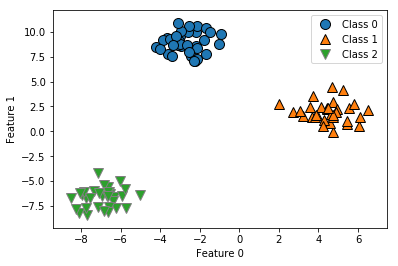

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [3]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


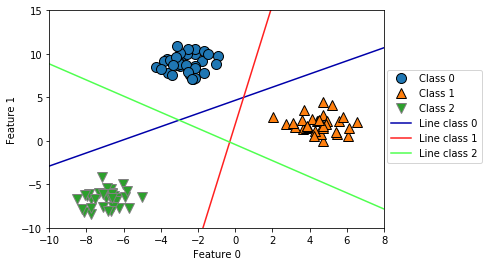

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

# Nonlinear Support Vector Machine (SVM with kernel)


* Linear SVM

> - Loss: $L_{linearSVM}=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j X_i \cdot X_j}$
> - Discrimant function: $WX+b = \sum_i{\alpha_iy_iX_i}\cdot X +b$


* SVM with kernel

> Introduce a nonlinear transform $\phi(X)$

> - Loss: $L_{nonlinearSVM}=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j \phi(X_i) \phi(X_j)}$
> - Discrimant function: $W\phi(X)+b = \sum_i{\alpha_iy_i\phi(X_i)}\cdot \phi(X) +b$

> However, it is hard to find appropriate $\phi(x)$.

* Kernel function $K(X_i,X_j)=\phi(X_i) \phi(X_j)$

> Replace $\phi(X_i) \phi(X_j)$ with $K(X_i,X_j)$
 >- $L_{nonlinearSVM}=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j K(X_i,X_j)}$
 > - Discrimant function: $W\phi(X)+b = \sum_i{\alpha_i y_i K(X_i,X)} +b$
 
 See https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Text(0, 0.5, 'Feature 1')

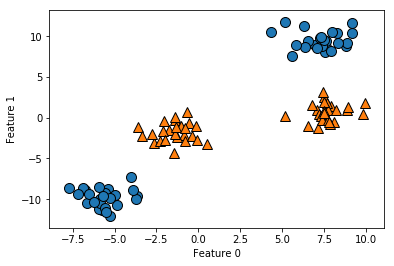

In [5]:
from sklearn.model_selection import train_test_split

# linearly non-separable task
X, y = sk.datasets.make_blobs(centers=4, random_state=8)
y = y % 2

# visualize data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

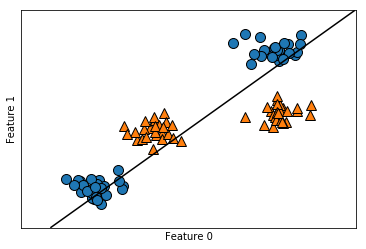

In [6]:
# linear SVC does not work well for linearly non-separable data

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

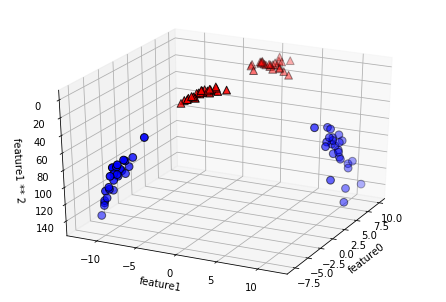

In [7]:
# transform to high-dimensional space by adding the squared second feature

X_new = np.hstack([X, X[:, 1:] ** 2])

# visualization
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

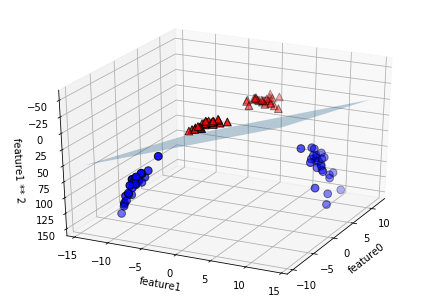

In [8]:
# Now, linear SVC works

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

## SVM with RBF kernel

$K_{RBF}(X_i,X_j)=exp(-\gamma |X_i-X_j|^2)$

Text(0, 0.5, 'Feature 1')

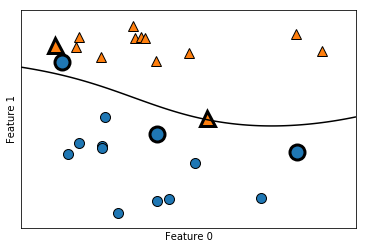

In [9]:
# kernel trick
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

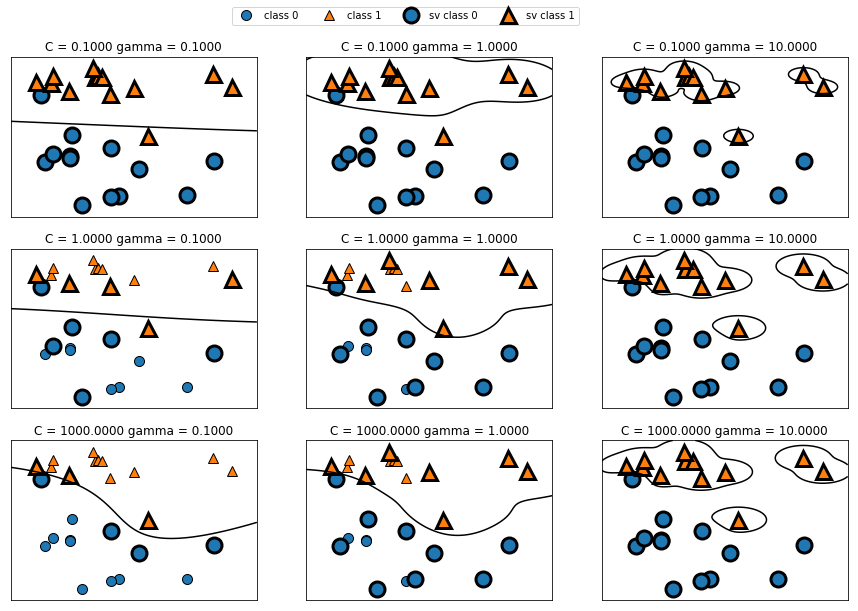

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [11]:
# SVC is sensitive to hyper-parameters
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Preprocessing data for SVM (Min-Max normalization)

In [12]:
# min-max normaization

# compute the min and max value per feature on the training set
min_on_training = X_train.min(axis=0)
max_on_training = X_train.max(axis=0)

# subtract the min, and divide by range
X_train_scaled = (X_train - min_on_training) / (max_on_training - min_on_training)

# afterward, min=0 and max=1 for each feature
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [0]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / (max_on_training - min_on_training)

In [14]:
# Then, SVC provides much better performance

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


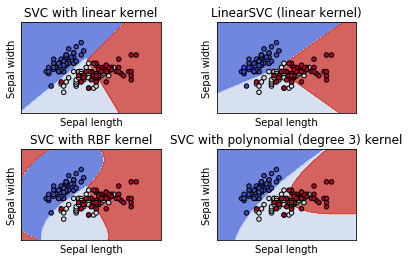

In [15]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Digit Classification with SVM


In [0]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

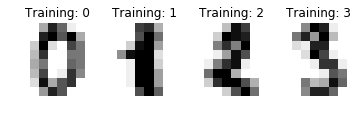

In [21]:
# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [22]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print("Totally, {} samples".format(n_samples))
data = digits.images.reshape((n_samples, -1))

Totally, 1797 samples


In [23]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

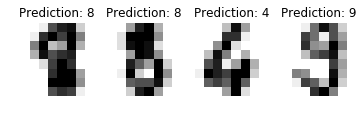

In [25]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()